In [1]:
# Data Manipulation
import numpy as np
import pandas as pd
import re


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Warnings
import warnings
warnings.filterwarnings("ignore")  # Hiding the warnings

# Feature Engineering
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest, chi2 
from sklearn.model_selection import *  
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
import xgboost as xgb
from xgboost import *

# Model evaluation
from sklearn import metrics
from sklearn.metrics import *


In [2]:
# Loading the data
df = pd.read_csv(r"Data_for_UCI_named.csv")
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [4]:
df.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [5]:
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [6]:
df[ 'stabf' ].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [7]:
df[df.duplicated()].shape

(0, 14)

In [8]:
#code to drop stab column
df = df.drop(columns= 'stab' )

In [9]:
df["stabf"].replace({"unstable":1, "stable":0}, inplace= True)

In [12]:
import sklearn.utils
df = sklearn.utils.shuffle(df)
df = df.reset_index(drop= True )
df.shape
df.stabf.value_counts()

1    6380
0    3620
Name: stabf, dtype: int64

In [14]:
X = df.drop(columns= 'stabf' )
y = df[ 'stabf' ]

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2 , random_state= 1 )
y_train.value_counts()

1    5102
0    2898
Name: stabf, dtype: int64

In [16]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state= 1 )
x_train_balanced, y_balanced = smote.fit_resample(x_train, y_train)

In [17]:
from sklearn.preprocessing import StandardScaler
standard =StandardScaler() 
x_train_st=standard.fit_transform(x_train_balanced,y_balanced)

In [18]:
from sklearn.preprocessing import StandardScaler
standard =StandardScaler() 
x_test_st=standard.fit_transform(x_test)

In [19]:
# Instantiate the models
log_reg_model = LogisticRegression(random_state=1)
dt_model = DecisionTreeClassifier(random_state=1)
rf_model = RandomForestClassifier(random_state=1)
knn_model = KNeighborsClassifier(n_neighbors = 3)
svm_model = SVC(random_state=1)
Naive_model = GaussianNB()
lgb_model = lgb.LGBMClassifier(random_state=1)
xgb_model = XGBClassifier(random_state=1)

In [20]:
# Create a dictionary of models
models = {
    "Logistic Regressor": log_reg_model,
    "Decision Tree Classifier": dt_model,
    "Random Forest Model": rf_model,
    "K Nearest Neighbors Algorithm": knn_model,
    "Support Vector Machine": svm_model,
    "Naive Bayes Algorithm": Naive_model,
    "LightGBM": lgb_model,
    "XGBoost": xgb_model
}

In [23]:
# Defining a helper function to fit models to data and score them
def classification_fit_and_score(models, X_train= x_train_st, X_test= x_test_st, 
                                 y_train= y_balanced, y_test= y_test):
    
    # List to collect the results
    results = []
    
    # Looping through the models to fit and score each
    for name, model in models.items():

        # fitting to the training data
        model.fit(X_train, y_train)

        # making predictions
        y_pred = model.predict(X_test)
        
        # Append model performance results
        results.append([
        name,
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        accuracy_score(y_test, y_pred)
        ])

        # Print Classification Report
        model_classification_report = classification_report(y_test, y_pred)
        print(f"{name} Model Classification Report", "\n", model_classification_report, "\n")
        
        #The Confusion Matrix of the Predictions
        cmf = confusion_matrix(y_test, y_pred, labels=[0, 1])
        cm_matrix = pd.DataFrame(data=cmf, columns=["Actual Positive", "Actual Negative"], index=["Predict Positive", "Predict Negative"])
        sns.heatmap(cm_matrix, annot=True, fmt="d", cmap="YlGnBu")
        plt.title("The Confusion Matrix of the Predictions", y = 1.05)
        plt.show()
        

        print("----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  -----", "\n") 
        print("----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  -----", "\n")
    
    # Put the results together
    eval_df = pd.DataFrame(results, columns=["model", "precision", "recall", "f1_score", "accuracy"])
    eval_df.set_index("model", inplace=True)
    eval_df.sort_values(by = ["f1_score", "accuracy", "recall"], ascending = False, inplace = True)
    
    return eval_df

Logistic Regressor Model Classification Report 
               precision    recall  f1-score   support

           0       0.64      0.88      0.74       722
           1       0.91      0.73      0.81      1278

    accuracy                           0.78      2000
   macro avg       0.78      0.80      0.78      2000
weighted avg       0.82      0.78      0.79      2000
 



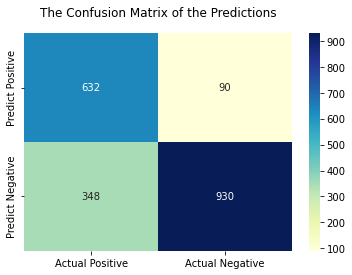

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

Decision Tree Classifier Model Classification Report 
               precision    recall  f1-score   support

           0       0.71      0.86      0.78       722
           1       0.91      0.80      0.85      1278

    accuracy                           0.82      2000
   macro avg       0.81      0.83      0.82      2000
weighted avg       0.84      0.82      0.83      2000
 



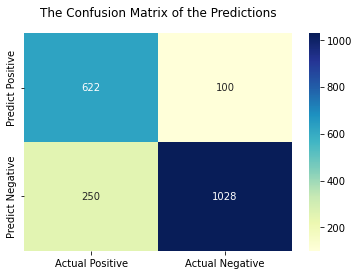

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

Random Forest Model Model Classification Report 
               precision    recall  f1-score   support

           0       0.78      0.97      0.86       722
           1       0.98      0.84      0.91      1278

    accuracy                           0.89      2000
   macro avg       0.88      0.91      0.88      2000
weighted avg       0.91      0.89      0.89      2000
 



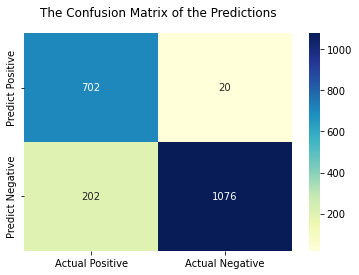

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

K Nearest Neighbors Algorithm Model Classification Report 
               precision    recall  f1-score   support

           0       0.69      0.87      0.77       722
           1       0.92      0.78      0.84      1278

    accuracy                           0.81      2000
   macro avg       0.80      0.83      0.81      2000
weighted avg       0.83      0.81      0.82      2000
 



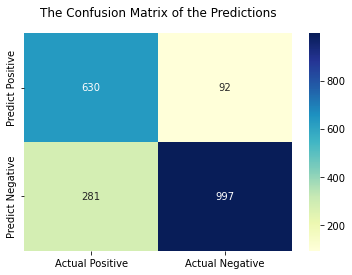

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

Support Vector Machine Model Classification Report 
               precision    recall  f1-score   support

           0       0.80      0.99      0.89       722
           1       1.00      0.86      0.92      1278

    accuracy                           0.91      2000
   macro avg       0.90      0.93      0.90      2000
weighted avg       0.92      0.91      0.91      2000
 



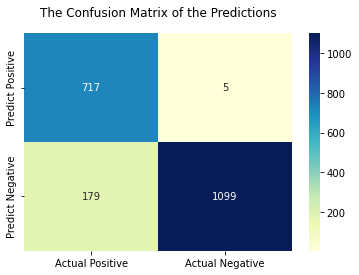

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

Naive Bayes Algorithm Model Classification Report 
               precision    recall  f1-score   support

           0       0.65      0.91      0.76       722
           1       0.94      0.72      0.81      1278

    accuracy                           0.79      2000
   macro avg       0.79      0.81      0.78      2000
weighted avg       0.83      0.79      0.79      2000
 



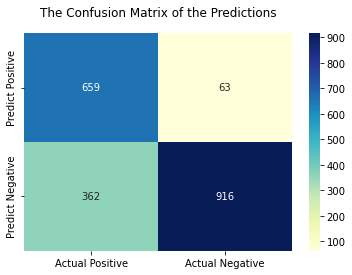

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

LightGBM Model Classification Report 
               precision    recall  f1-score   support

           0       0.81      0.99      0.89       722
           1       0.99      0.87      0.92      1278

    accuracy                           0.91      2000
   macro avg       0.90      0.93      0.91      2000
weighted avg       0.92      0.91      0.91      2000
 



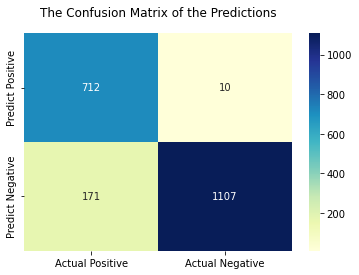

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

XGBoost Model Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.98      0.90       722
           1       0.99      0.88      0.93      1278

    accuracy                           0.92      2000
   macro avg       0.91      0.93      0.91      2000
weighted avg       0.93      0.92      0.92      2000
 



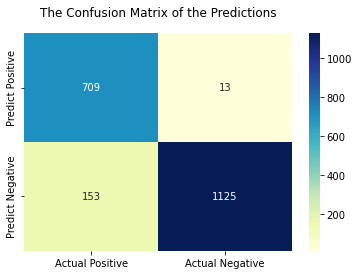

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 



,precision,recall,f1_score,accuracy
model,,,,
XGBoost,0.988576,0.880282,0.931291,0.9170
LightGBM,0.991047,0.866197,0.924426,0.9095
Support Vector Machine,0.995471,0.859937,0.922754,0.9080
Random Forest Model,0.981752,0.841941,0.906487,0.8890
Decision Tree Classifier,0.911348,0.804382,0.854530,0.8250
K Nearest Neighbors Algorithm,0.915519,0.780125,0.842417,0.8135
Naive Bayes Algorithm,0.935649,0.716745,0.811697,0.7875
Logistic Regressor,0.911765,0.727700,0.809399,0.7810


In [24]:
model_performances = classification_fit_and_score(models)
model_performances

In [27]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)